Этап 1: загрузка данных, проверка на пропущенные значение и удаление их, если они присутствуют. Стандартизация данных

In [ ]:
from google.colab import files
#files.upload()

import pandas as pd
from sklearn.preprocessing import StandardScaler

#Загрузка данных
df = pd.read_csv("Mall_Customers.csv")
#Выбор только числовых столбцов
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df.head)
#Проверка на пропущенные значения
print("Пропущенные значения\n", df.isnull().sum())
#Стандартизируем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<bound method NDFrame.head of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]>
Пропущенные значения
 Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Этап 2: определим оптимальное количество кластеров с помощью метода локтя и метода коэффициента силуэта

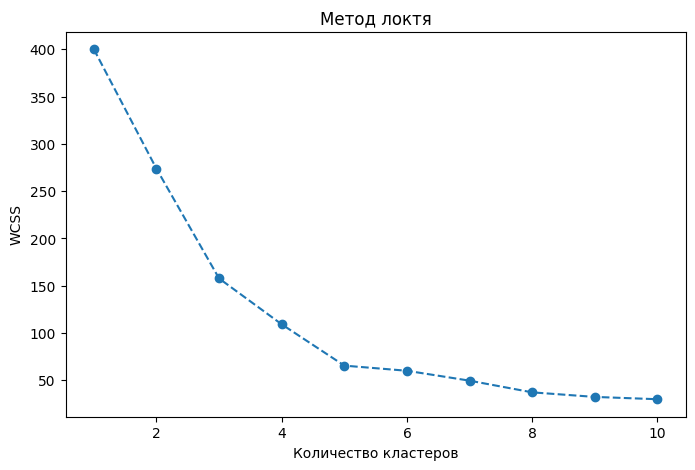

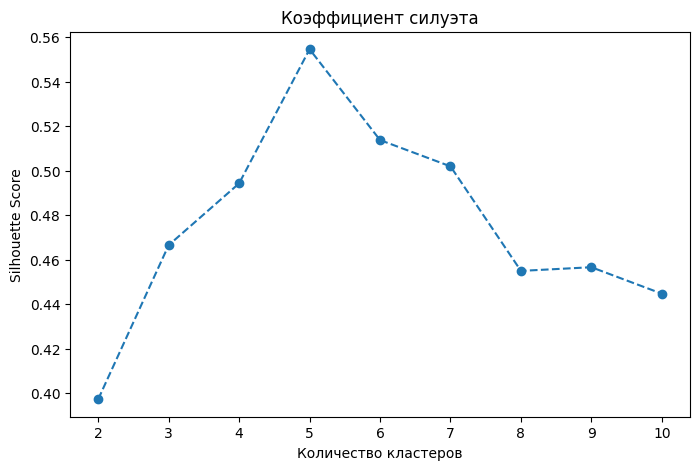

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Метод локтя
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()
#На рисунке при k=5 wcss перестает сильно снижаться, а значит это оптимальное количество кластеров

#Коэффициент силуэта
sil_score = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  cluster_labels = kmeans.fit_predict(df_scaled)
  sil_avg = silhouette_score(df_scaled, cluster_labels)
  sil_score.append(sil_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_score, marker='o', linestyle='--')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.show()
#При K=5 коэфф силуэта максимален, а значит это оптимальное количество кластеров

Этап 3: реализуем алгоритмы кластеризации. Метод k средних, DBSCAN, иерархическая кластеризация
.

Метки кластеров (K-средние): [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


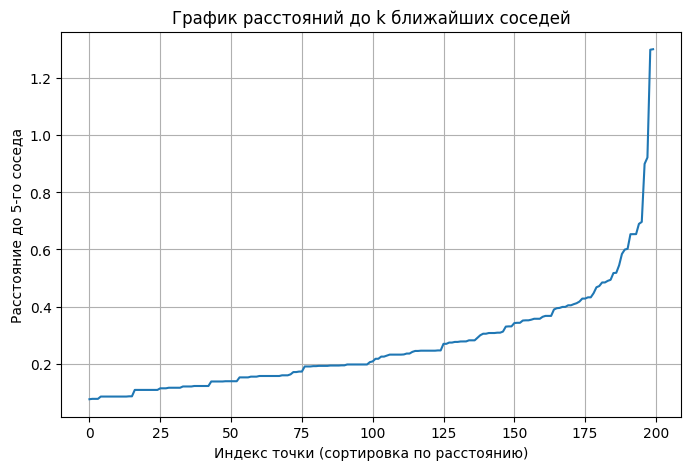

Метки кластеров (DBSCAN): [ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Метки кластеров (Иерархическая кластеризация): [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering

#Метод k-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
print("Метки кластеров (K-средние):", kmeans_labels)


#Метод для поиска оптимальных eps и min_samples. Суть в том, чтобы найти перелом, когда линия резко начинает идти вверх, там и будет лучший eps (метод так себе, ибо не всегда понятен изгиб)
k = 5 # min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("График расстояний до k ближайших соседей")
plt.xlabel("Индекс точки (сортировка по расстоянию)")
plt.ylabel(f"Расстояние до {k}-го соседа")
plt.grid()
plt.show()

#Метод DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5) #eps - Максимальное расстояние для объединения точек,  min_samples - минимальное число точек для образования кластера
dbscan_labels = dbscan.fit_predict(df_scaled)
print("Метки кластеров (DBSCAN):", dbscan_labels) #-1 это выбросы

#Иерархическая кластеризация
hierarch = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarch_labels = hierarch.fit_predict(df_scaled)
print("Метки кластеров (Иерархическая кластеризация):", hierarch_labels)

Этап 4: построим дендрограмму для иерархической кластеризации.


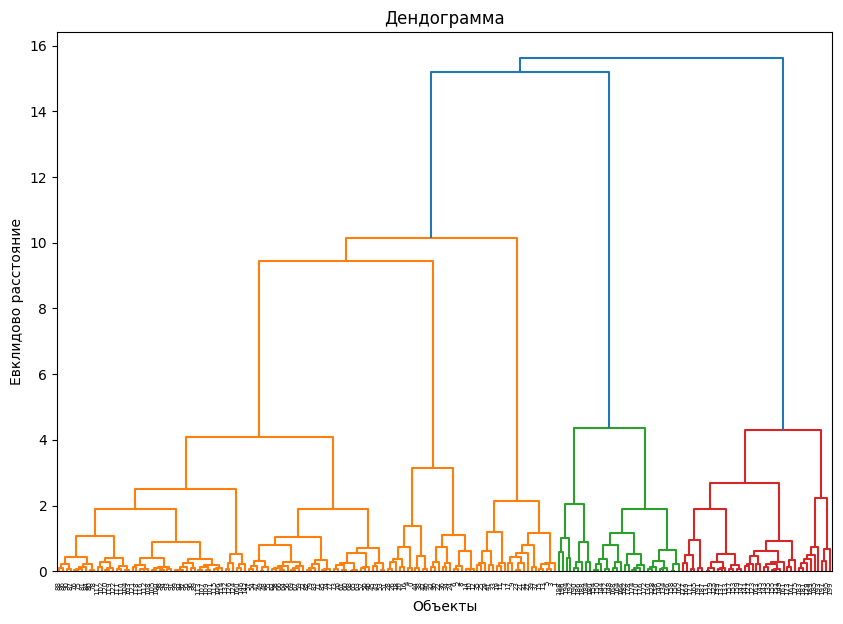

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Дендрограмма
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending')
plt.title("Дендограмма")
plt.xlabel("Объекты")
plt.ylabel("Евклидово расстояние")
plt.show()

Этап 5: построим графики для всех методов кластеризации. K средние, DBSCAN, иерархическая кластеризация.

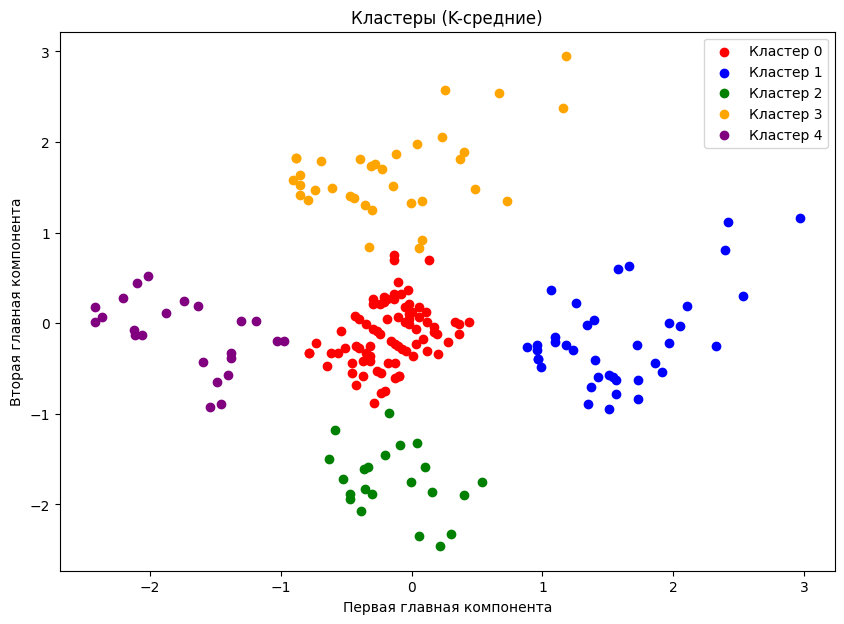

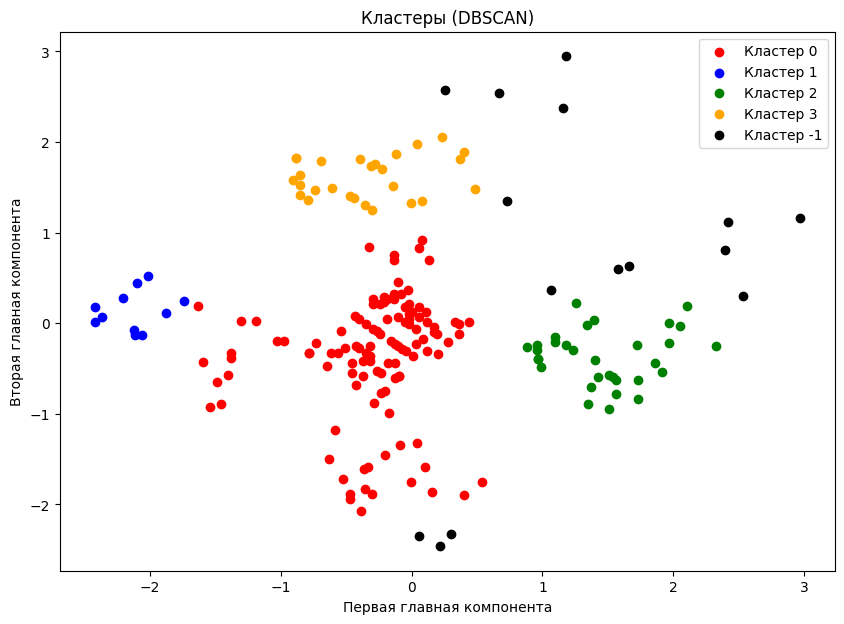

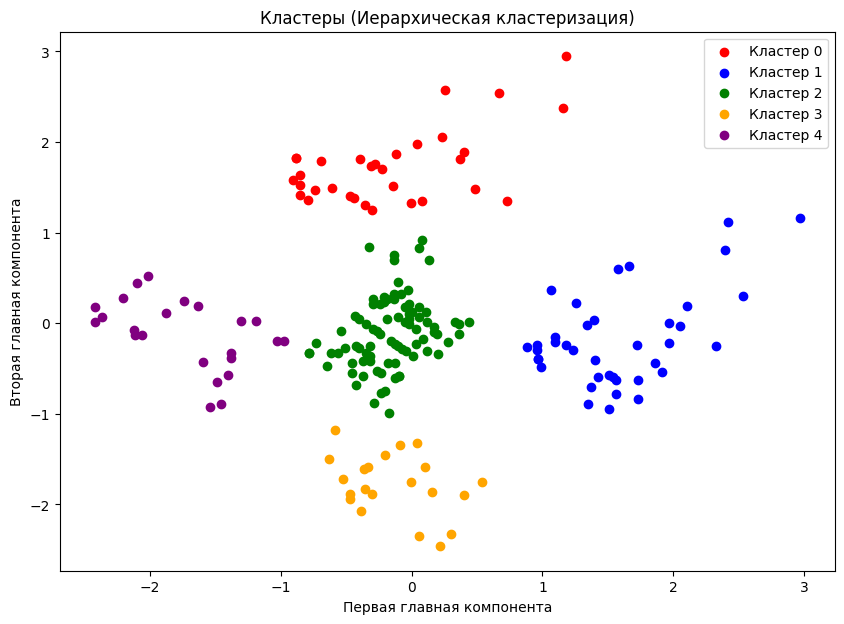

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)#Для построения гарфиков в 2d. 1 гл компонента - основная дисперсия, 2 гл компонента - оставшаяся дисперсия
df_pca = pca.fit_transform(df_scaled)

colors = ['red', 'blue', 'green', 'orange', 'purple']

#Визуализация кластеров (K-средние)
plt.figure(figsize=(10, 7))
for cluster in range(5):
    plt.scatter(df_pca[kmeans_labels == cluster, 0],
                df_pca[kmeans_labels == cluster, 1],
                label=f'Кластер {cluster}',
                color=colors[cluster])
plt.title("Кластеры (K-средние)")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.legend()
plt.show()

#Визуализация кластеров (DBSCAN)
plt.figure(figsize=(10, 7))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    color = 'black' if label == -1 else colors[label % len(colors)]  #Черный для выбросов
    plt.scatter(df_pca[dbscan_labels == label, 0],
                df_pca[dbscan_labels == label, 1],
                label=f'Кластер {label}',
                color=color)
plt.title("Кластеры (DBSCAN)")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.legend()
plt.show()

#Визуализация кластеров (Иерархическая кластеризация)
plt.figure(figsize=(10, 7))
for cluster in range(5):
    plt.scatter(df_pca[hierarch_labels == cluster, 0],
                df_pca[hierarch_labels == cluster, 1],
                label=f'Кластер {cluster}',
                color=colors[cluster])
plt.title("Кластеры (Иерархическая кластеризация)")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.legend()
plt.show()


Этап 6: сравним основные метрики оценки качества кластеризации. Метод силуэтного коэффициента.

In [ ]:
from sklearn.metrics import silhouette_score

#Расчет силуэтного коэффициента
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f"Силуэтный коэффициент (K-средние): {kmeans_silhouette:.3f}")

dbscan_silhouette = silhouette_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Силуэтный коэффициент (DBSCAN): {dbscan_silhouette:.3f}")

hierarch_silhouette = silhouette_score(df_scaled, hierarch_labels)
print(f"Силуэтный коэффициент (Иерархическая кластеризация): {hierarch_silhouette:.3f}")

Силуэтный коэффициент (K-средние): 0.555
Силуэтный коэффициент (DBSCAN): 0.478
Силуэтный коэффициент (Иерархическая кластеризация): 0.554


Метрика Калинского-Харабаза

In [ ]:
from sklearn.metrics import calinski_harabasz_score

#Метрика Калинского-Харабаза
ch_score_kmeans = calinski_harabasz_score(df_scaled, kmeans_labels)
print(f"Индекс Калинского-Харабаза (K-средние): {ch_score_kmeans:.3f}")

ch_score_dbscan = calinski_harabasz_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Индекс Калинского-Харабаза (DBSCAN): {ch_score_dbscan:.3f}")

ch_score_hierarch = calinski_harabasz_score(df_scaled, hierarch_labels)
print(f"Индекс Калинского-Харабаза (Иерархическая кластеризация): {ch_score_hierarch:.3f}")

Индекс Калинского-Харабаза (K-средние): 248.649
Индекс Калинского-Харабаза (DBSCAN): 146.888
Индекс Калинского-Харабаза (Иерархическая кластеризация): 244.410
